In [16]:
import pandas as pd
import pickle

In [17]:
with open('model_filename.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [18]:
df = pd.read_csv('testing_sample.csv')
df

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,9d24-25k4-47889d24-25k4-494b-398124,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,7732-1k58-47887732-1k58-4475-679678,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,94k2-632j-471394k2-632j-4b4j-228160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,jdd8-419d-4714jdd8-419d-4198-674376,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,7473-7595-47147473-7595-4757-227547,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151650,d14b-520k-0j15d14b-520k-4kk2-660471,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
151651,d427-5450-0j15d427-5450-4661-370635,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
151652,8869-1022-0j168869-1022-4490-699568,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
151653,5893-2228-0j165893-2228-4kb7-871348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


In [19]:
df.iloc[1]

UserID                     7732-1k58-47887732-1k58-4475-679678
basket_icon_click                                            0
basket_add_list                                              0
basket_add_detail                                            0
sort_by                                                      0
image_picker                                                 0
account_page_click                                           0
promo_banner_click                                           0
detail_wishlist_add                                          0
list_size_dropdown                                           0
closed_minibasket_click                                      0
checked_delivery_detail                                      0
checked_returns_detail                                       0
sign_in                                                      0
saw_checkout                                                 0
saw_sizecharts                                         

In [20]:
df =df.drop(['ordered','UserID','device_mobile'], axis=1)
len(df.columns)

22

In [23]:
loaded_model

GaussianNB()

In [28]:
a = loaded_model.predict_proba(df.iloc[[100]])[:,1]
a = pd.DataFrame(a)
a

,0
0,3.694766e-14


In [2]:
import pandas as pd
df = pd.read_csv('results.csv') 

import numpy as np
 
def convert_to_score(probability, epsilon=1e-10):
    score = np.log((probability + epsilon) / (1 - probability + epsilon))
    return score+30
 
df['score'] = df['propensity'].apply(lambda x: convert_to_score(x))
# df.to_csv('results1.csv', index=False)

In [4]:
df = df.sort_values(by='score', ascending=False) 
print(len(df[(5 < df['score']) & (df['score'] < 10)]))
print(len(df[(10 < df['score']) & (df['score'] < 30)]))
print(len(df[(df['score'] > 30)]))

148452
1268
1935


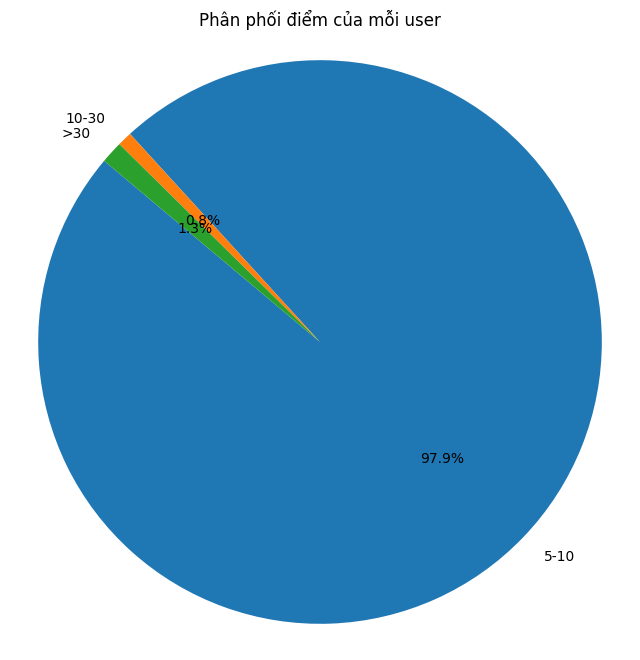

In [28]:
import matplotlib.pyplot as plt

# Dữ liệu UserID và score
user_ids = df['UserID']
scores = df['score']
 
score_counts = {'5-10': 0, '10-30': 0, '>30': 0}
 
for score in scores:
    if 5 <= score < 10:
        score_counts['5-10'] += 1
    elif 10 <= score <= 30:
        score_counts['10-30'] += 1
    elif score > 30:
        score_counts['>30'] += 1
 
scores = list(score_counts.keys())
counts = list(score_counts.values())

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=scores, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.title('Phân phối điểm của mỗi user')
plt.show()


16
14
14
14
14
14
14
2
